C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


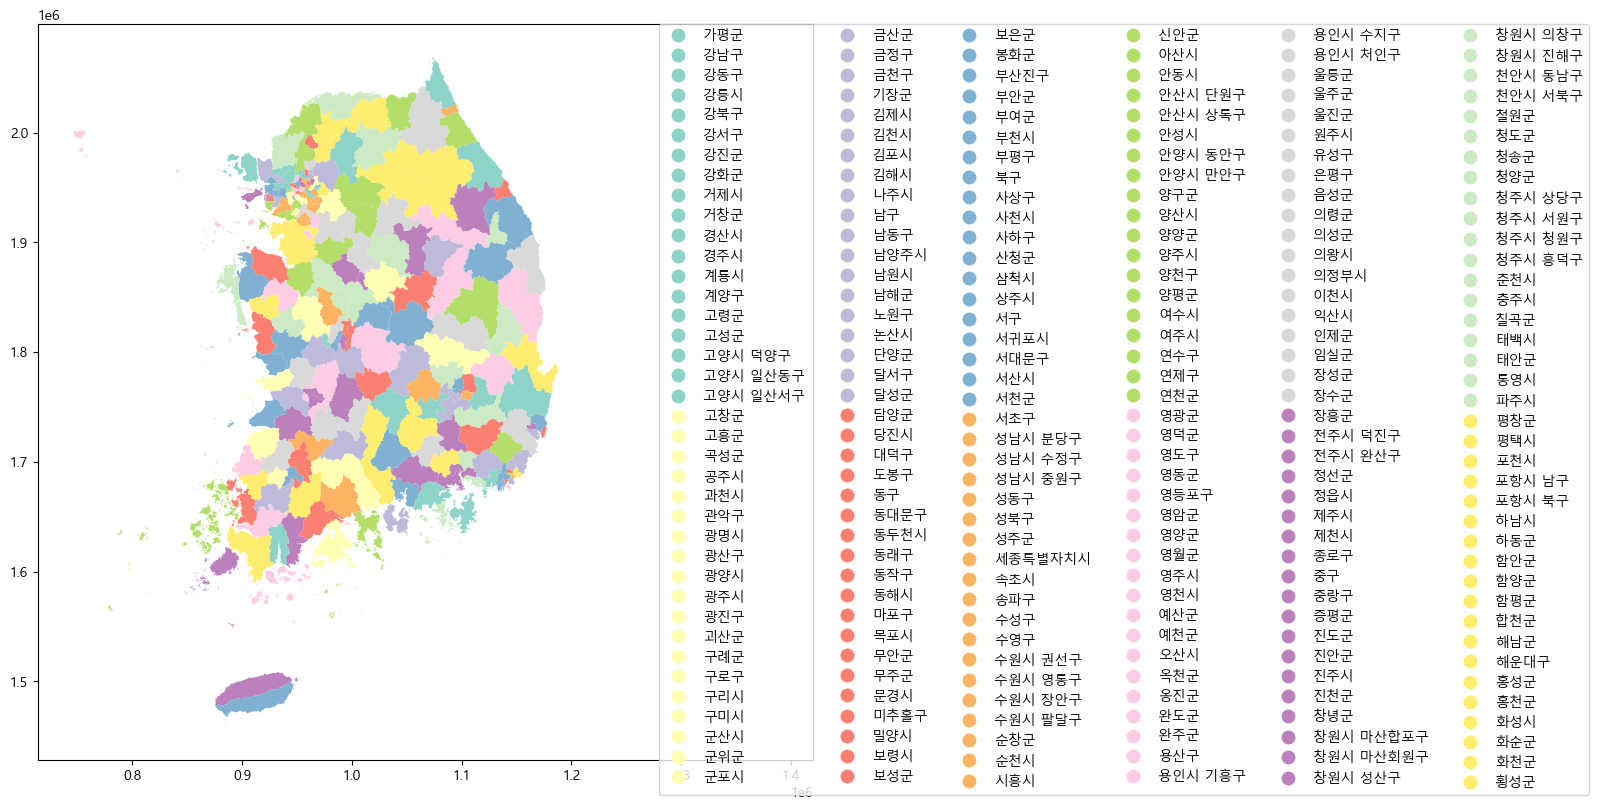

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Define file paths
shp_file = 'data/sig.shp'
dbf_file = 'data/sig.dbf'
shx_file = 'data/sig.shx'

# Load the shapefile
gdf = gpd.read_file(shp_file, encoding='euc-kr')

plt.rcParams['font.family'] = 'Malgun Gothic'
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='SIG_KOR_NM', ax=ax, legend=True, legend_kwds={'bbox_to_anchor': (2.01, 1.01), 'ncol': 6}, cmap='Set3')
plt.show()

In [3]:
gdf 

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
...,...,...,...,...
245,51790,Hwacheon-gun,화천군,"POLYGON ((1027779.614 2032000.017, 1027951.841..."
246,51800,Yanggu-gun,양구군,"MULTIPOLYGON (((1046391.747 2032451.649, 10463..."
247,51810,Inje-gun,인제군,"POLYGON ((1041948.853 1995343.843, 1042054.076..."
248,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917..."


In [13]:
law_city_codes = pd.read_csv('data/법정동코드_시군구.csv', encoding='cp949')

In [14]:
for i in range(5):  # cluster00.csv부터 cluster04.csv까지
    cluster = pd.read_csv(f'data/cluster0{i}.csv', encoding='cp949')
    
    # '지역'이 '시군구'와 일치하는 '법정동코드'를 찾아 'SIG_CD' column에 추가
    cluster['SIG_CD'] = cluster['지역'].map(law_city_codes.set_index('시군구')['법정동코드'])

    # CSV 파일로 저장
    cluster.to_csv(f'data/cluster0{i}.csv', index=False, encoding='cp949')

In [28]:
# Check if the given SIG_KOR_NM are in the shapefile
sig_kor_nm_list = ['양구군', '영월군', '인제군', '정선군', '철원군', '태백시','홍천군','화천군','횡성군','속초시','양양군','강릉시','고성군','원주시','춘천시','평창군','동해시','삼척시']
gdf[gdf['SIG_KOR_NM'].isin(sig_kor_nm_list)]

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,color
223,48820,Goseong-gun,고성군,"MULTIPOLYGON (((1067900.493 1654036.440, 10678...",red
232,51110,Chuncheon-si,춘천시,"POLYGON ((1007462.095 2008948.792, 1007512.150...",gray
233,51130,Wonju-si,원주시,"POLYGON ((1038519.196 1944888.174, 1038552.691...",gray
234,51150,Gangneung-si,강릉시,"MULTIPOLYGON (((1136545.803 1962251.161, 11365...",gray
235,51170,Donghae-si,동해시,"MULTIPOLYGON (((1140184.975 1956251.627, 11401...",gray
236,51190,Taebaek-si,태백시,"POLYGON ((1133987.168 1927444.971, 1133980.895...",gray
237,51210,Sokcho-si,속초시,"MULTIPOLYGON (((1097565.776 2022623.133, 10975...",gray
238,51230,Samcheok-si,삼척시,"MULTIPOLYGON (((1158822.812 1924922.029, 11588...",gray
239,51720,Hongcheon-gun,홍천군,"POLYGON ((1046324.015 1994003.079, 1046427.876...",gray
240,51730,Hoengseong-gun,횡성군,"POLYGON ((1022931.707 1944049.288, 1022936.092...",gray


In [36]:
print(gdf[gdf['color']=='gray'])

    SIG_CD   SIG_ENG_NM SIG_KOR_NM  \
248  51820  Goseong-gun        고성군   

                                              geometry color  
248  MULTIPOLYGON (((1091705.056 2034023.203, 10917...  gray  


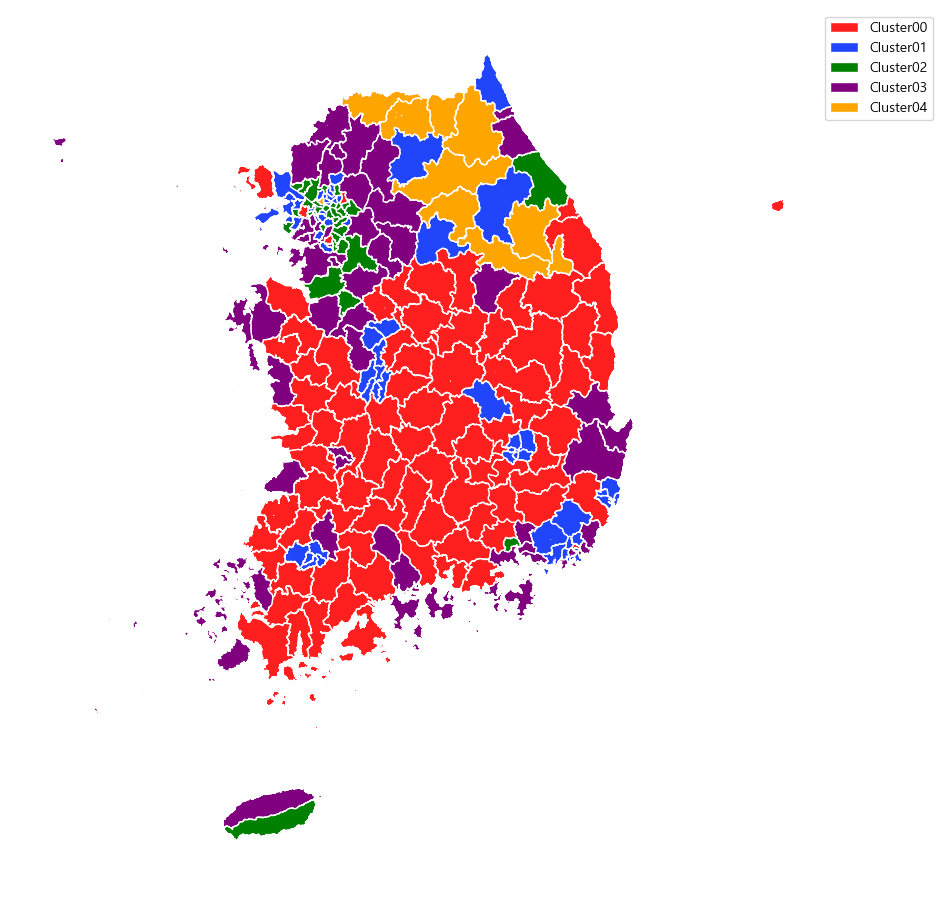

In [42]:
# Define color map
color_map = {
    'cluster00': '#ff1f1f',  # Light red
    'cluster01': '#2045fa',  # Light blue
    'cluster02': 'green',
    'cluster03': 'purple',
    'cluster04': 'orange',
}

# Convert 'SIG_CD' to string
gdf['SIG_CD'] = gdf['SIG_CD'].astype(str)

# Load each cluster file and add the color to the geodataframe
for i in range(5):
    cluster = pd.read_csv(f'data/cluster0{i}.csv', encoding='cp949')
    cluster['SIG_CD'] = cluster['SIG_CD'].astype(str)
    gdf.loc[gdf['SIG_CD'].isin(cluster['SIG_CD']), 'color'] = color_map[f'cluster0{i}']

# Assign gray color to the regions that do not belong to any cluster
gdf['color'].fillna('gray', inplace=True)

plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(1, 1, figsize=(12, 12))  

gdf.plot(color=gdf['color'], ax=ax, edgecolor='white')  

# Hide axes and borders
ax.axis('off')
for spine in ax.spines.values():
    spine.set_visible(False)

# Define legend elements
legend_elements = [Patch(facecolor=color_map[f'cluster0{i}'], edgecolor='white', label=f'Cluster0{i}') for i in range(5)]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right')

# Save the figure
plt.savefig('image/result_of_clustering.png')

plt.show()